In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

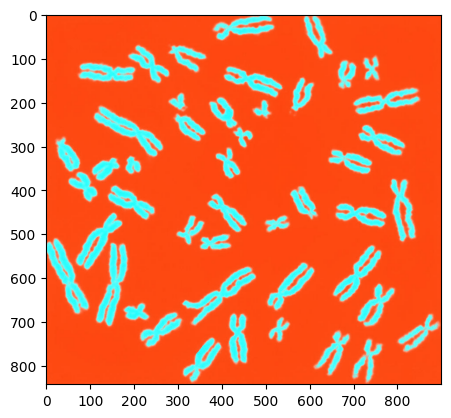

In [2]:
# Load the image
original_image = cv2.imread("chromosomes.jpg")

# Display the image
plt.imshow(original_image)

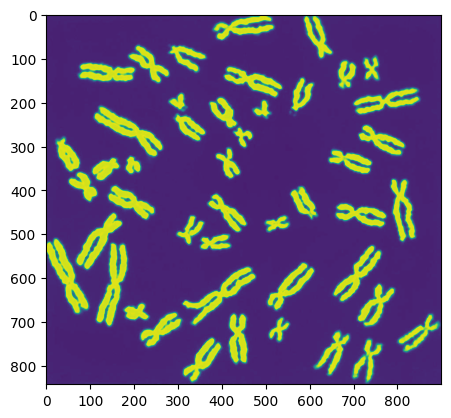

In [3]:
# Convert to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
original_gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Display the image
plt.imshow(original_gray_image)

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

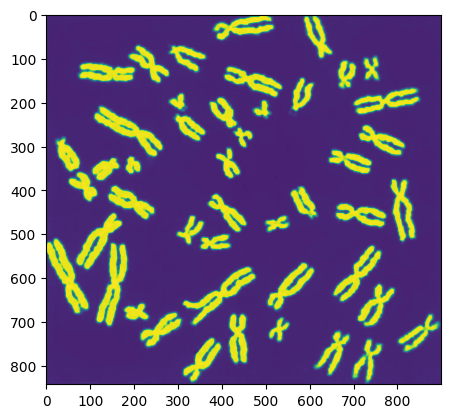

In [5]:
gray_image = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)
# Display the image
plt.imshow(gray_image)

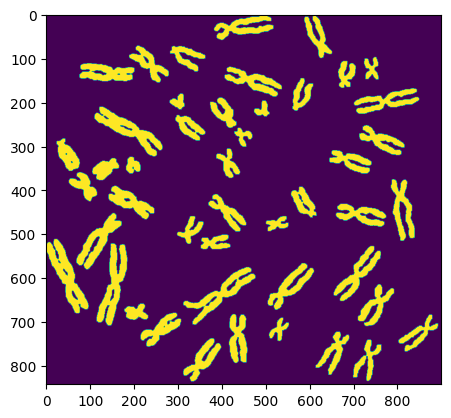

In [6]:
ret, thresh_image = cv2.threshold(gray_image,170,255,cv2.THRESH_BINARY)
# Display the image
plt.imshow(thresh_image)

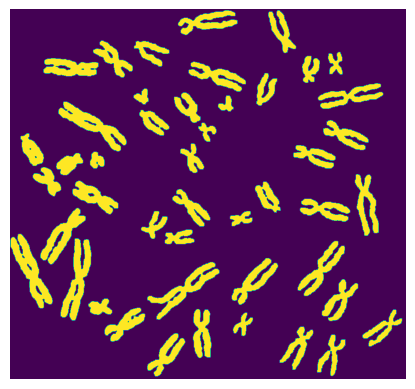

In [7]:
contours, hierarchy = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(gray_image, contours, -1, (0,255,0), 2)

# Display the image
plt.axis('off')
plt.imshow(thresh_image)

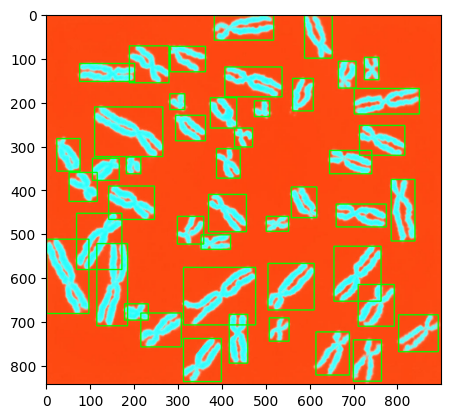

In [8]:
df = pd.DataFrame(columns=['Height', 'Width', 'Area', 'Perimeter', 'Circularity'])
threshold_contours = 5
if len(contours) >= threshold_contours:
  for idx, contour in enumerate(contours):
    area= cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    circularity = (4 * np.pi * area) / (perimeter ** 2)
    x, y, width, height = cv2.boundingRect(contour)
    cv2.rectangle(original_image, (x, y), (x + width, y + height), (0, 255, 0), 2)
    df.loc[idx] = [height, width, area, perimeter, circularity]
else:
  print("Not enough chromosomes")

plt.imshow(original_image)

In [9]:
print(df)

    Height  Width    Area   Perimeter  Circularity
0     94.0   64.0  1924.0  410.735062     0.143315
1     98.0   86.0  2889.5  446.457930     0.182168
2     98.0   76.0  2298.0  428.617311     0.157188
3     53.0   45.0   901.0  209.681239     0.257523
4     84.0   90.0  2003.5  433.002086     0.134282
5    111.0   42.0  2996.0  470.048770     0.170399
6     77.0   92.0  2740.0  383.504614     0.234110
7     37.0   54.0  1237.0  177.681239     0.492375
8     95.0   82.0  2678.0  456.274165     0.161647
9    131.0  164.0  5170.0  605.896530     0.176972
10   106.0  105.0  3338.0  536.097540     0.145952
11   125.0  107.0  3673.5  597.452879     0.129325
12   187.0   70.0  5417.5  686.374671     0.144506
13   169.0   96.0  5596.0  556.215290     0.227301
14    33.0   67.0  1366.5  262.409161     0.249380
15    34.0   51.0   885.0  189.539104     0.309568
16    63.0   60.0  1350.0  264.450791     0.242579
17   128.0  103.0  4141.0  542.298550     0.176945
18    52.0  114.0  2823.5  485.